In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('data/clean.csv')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.123400e+04,21234.000000,21234.000000,21234.000000,2.123400e+04,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000,21234.000000
mean,5.388004e+05,3.373081,2.111402,2068.585523,1.192790e+04,1.493171,0.006734,0.228407,3.411086,7.649901,1776.461571,286.219554,1970.801309,1972.752802,98078.531082,47.561568,-122.217006,1978.310210,9792.347838
std,3.673580e+05,0.904794,0.765881,904.445495,2.673817e+04,0.540238,0.081789,0.756897,0.651147,1.165554,814.311870,438.041609,29.451977,29.035897,53.669323,0.137596,0.138204,680.094353,10151.196660
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.514000,460.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.474500,-122.329000,1480.000000,5080.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.545500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1974.000000,1977.000000,98070.000000,47.573150,-122.235000,1830.000000,7560.000000
75%,6.411500e+05,4.000000,2.500000,2540.000000,1.039900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,1999.000000,98118.000000,47.678500,-122.130000,2350.000000,9923.250000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,94403.000000


In [35]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


## Business Problem: Who are our clients, and what insignts do they need?
- Constructors: If it costs around the same money to build a feature, what feature gives the highest return on investment (ROI)? (Might need to do some outside research, but can be interesting)
- Resellers: It would be best to buy a house at a low price and sell at a higher price. So when they are looking for houses to invest in, our model can tell if a house is overpriced or underpriced.

- With the idea about making a visualization on a map - I was thinking it might be cool if we use a contour?

## More Data Cleaning and EDA

It looks like 'sqft_living' = 'sqft_above' + 'sqft_basement'.
Will remove 'sqft_living' to aviod multicolinearity (perfect multicolinearlity).

In [8]:
data.drop('sqft_living', axis=1, inplace=True)

converted some columns as int types for aesthetic purposes.

In [21]:
data.price = data.price.astype('int')
data.sqft_basement = data.sqft_basement.astype('int')
data.yr_renovated = data.yr_renovated.astype('int')

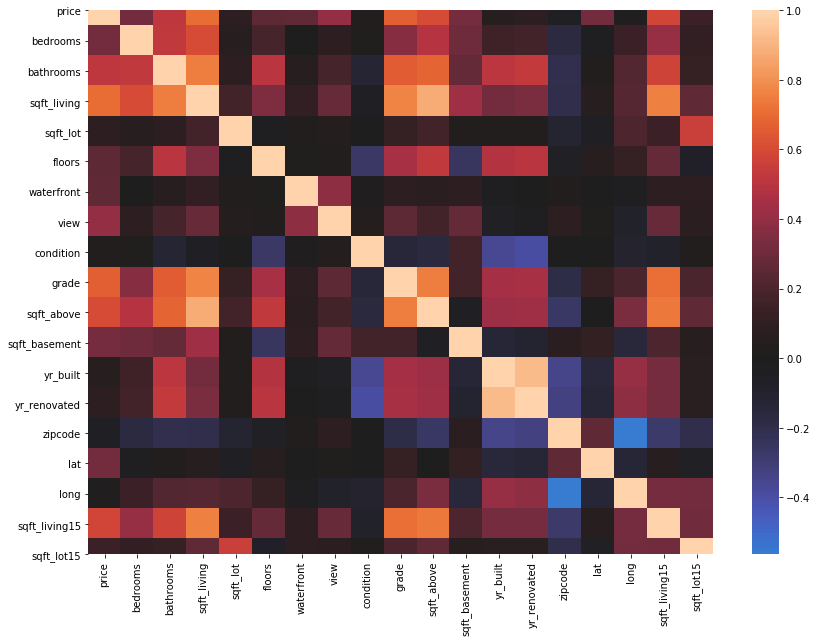

In [34]:
# Heatmap to visualize correlations between variables - refer to table in next cell if this is hard to see.
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), center=0);

In [32]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

In [33]:
df[(df.cc>.75) & (df.cc <1)]
# Variable pairs to be careful about! (again, multicolinearity)

,cc
pairs,
"(yr_renovated, yr_built)",0.926466
"(yr_built, yr_renovated)",0.926466
"(sqft_above, sqft_living)",0.873575
"(sqft_living, sqft_above)",0.873575
"(sqft_living, grade)",0.762419
"(grade, sqft_living)",0.762419
"(sqft_living, sqft_living15)",0.757176
"(sqft_living15, sqft_living)",0.757176
"(sqft_above, grade)",0.754818


### Uncertainty in data:
- I don't know what the 'date' represents - possibly the date that this particular datapoint was recorded?
- Also not sure what the last two columns 'sqft_living15' and 'sqft_lot15' represent.
- What exactly is a quater or half bathrooms? (same question with floors)

In [63]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


## Finding Correlations and making indexes

In [6]:
data.sqft_basement.describe()

count    21234.000000
mean       286.219554
std        438.041609
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

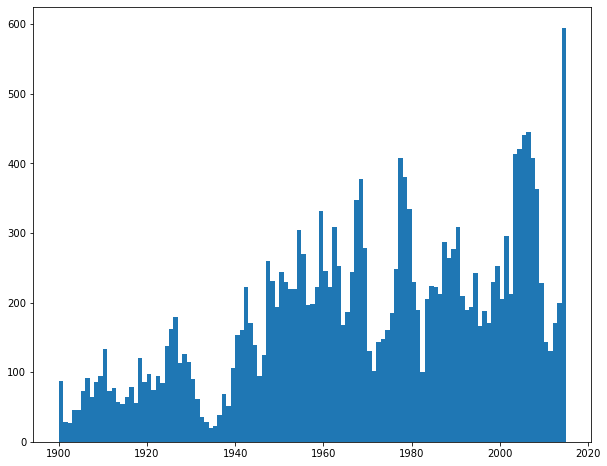

In [140]:
plt.figure(figsize=(10, 8))

plt.hist(data.yr_built, bins=2015-1900)
plt.show()

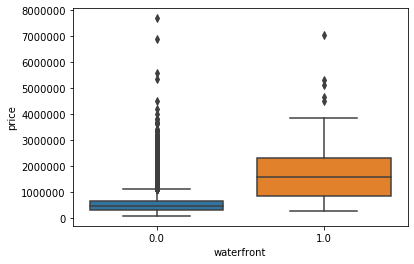

In [139]:
sns.boxplot(x="waterfront", y="price", data=data)

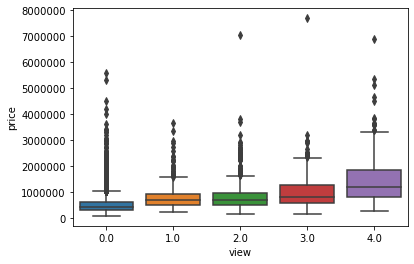

In [68]:
sns.boxplot(x="view", y="price", data=data)

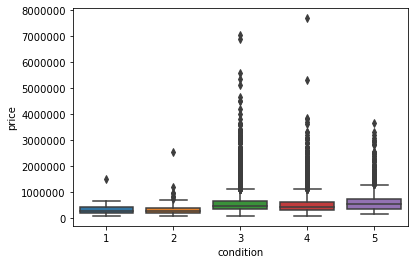

In [138]:
sns.boxplot(x="condition", y="price", data=data)

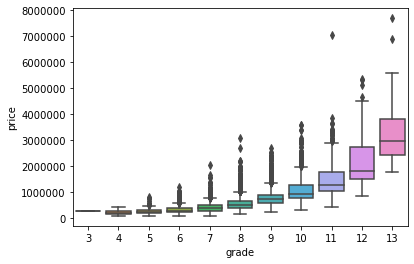

In [70]:
sns.boxplot(x="grade", y="price", data=data)

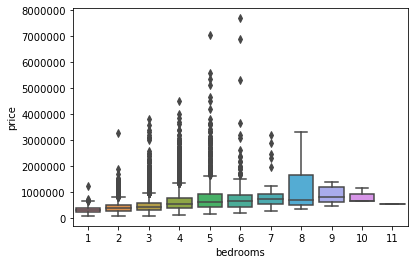

In [137]:
sns.boxplot(x="bedrooms", y="price", data=data)

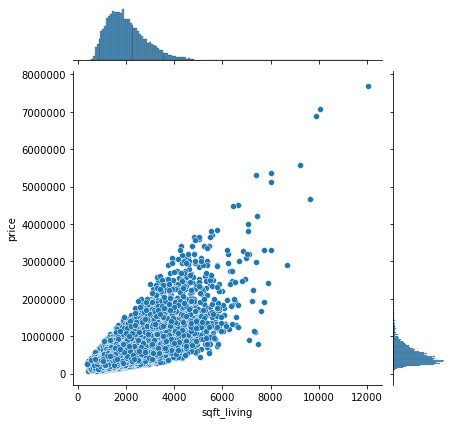

In [101]:
sns.jointplot(x="sqft_living", y="price", data=data)

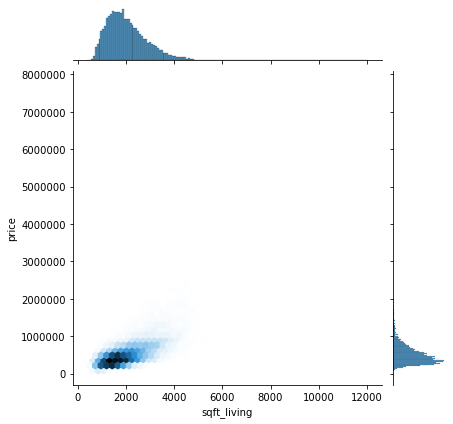

In [100]:
sns.jointplot(x="sqft_living", y="price", kind='hex', data=data)

In [99]:
a = data.loc[data['bedrooms'] == 3, ['bedrooms']]
b = data.loc[data['bedrooms'] == 3, ['bathrooms']]
a / b

,bathrooms,bedrooms
0,NaN,NaN
1,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
...,...,...
21224,NaN,NaN
21225,NaN,NaN
21228,NaN,NaN
21229,NaN,NaN


ValueError: shape mismatch: objects cannot be broadcast to a single shape

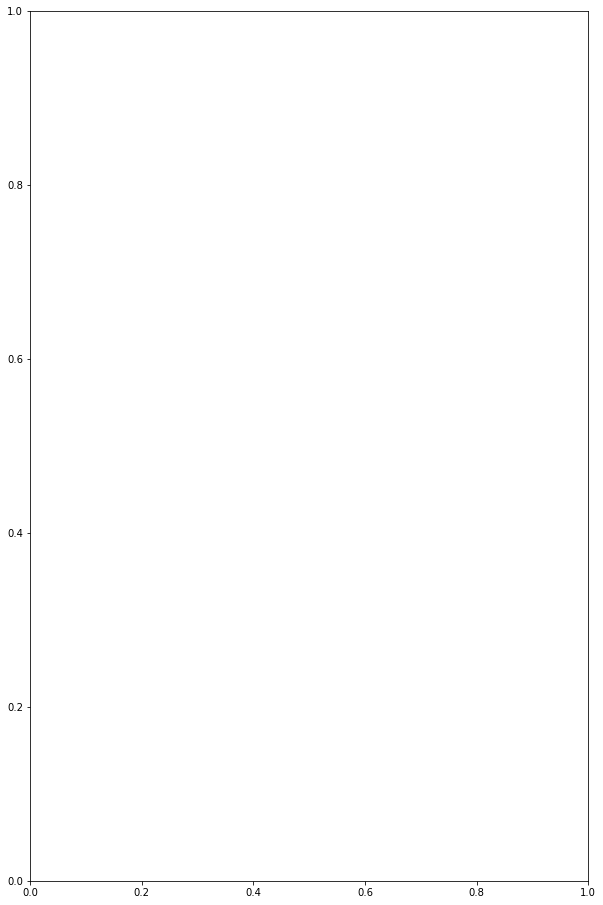

In [47]:
plt.figure(figsize=(10, 16))
plt.subplot()
plt.bar(data.loc[data['bedrooms'] == 3, ['bedrooms']] / data.loc[data['bedrooms'] == 3, ['bathrooms']], data.price)